# Exercise
1. Play with the above code to get familiar with stock price data and ways to create training data ( X = past stock price, y = future stock price )
2. Investigate if stock price of Big 5 companies are related to each other ( “FAAMG”—Facebook, Amazon, Apple, Microsoft, and Google )
3. Determine the features that could predict future stock price ( stock price from Yahoo Finance could be considered as raw features, create new features if needed )
4. Build a linear regression model to predict future stock price
5. Evaluate your model performance

In [31]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

import yfinance as yf

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Get a sample stock price from 2000-01-01 to today

In [5]:
startday = '2000-01-01'
today = datetime.date.today()
today = today.strftime('%Y-%m-%d')
today

'2020-05-14'

In [6]:
# Get the data of the Apple stock (code AAPL)
data = yf.download('AAPL', startday, today)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,3.604911,3.674107,3.553571,3.671875,3.178732,40952800
2000-01-03,3.745536,4.017857,3.631696,3.997768,3.460857,133949200
2000-01-04,3.866071,3.950893,3.613839,3.660714,3.169071,128094400
2000-01-05,3.705357,3.948661,3.678571,3.714286,3.215448,194580400
2000-01-06,3.790179,3.821429,3.392857,3.392857,2.937188,191993200


In [7]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-07,303.220001,305.170013,301.970001,303.739990,302.919983,28803800
2020-05-08,305.640015,310.350006,304.290009,310.130005,310.130005,33512000
2020-05-11,308.100006,317.049988,307.239990,315.010010,315.010010,36405900
2020-05-12,317.829987,319.690002,310.910004,311.410004,311.410004,40575300
2020-05-13,312.149994,315.950012,303.209991,307.649994,307.649994,50094200


In [8]:
data.shape

(5124, 6)

### Extract the Close price column to plot

In [9]:
df = pd.DataFrame(data, columns=['Close'])
df = df.reset_index()
df.isna().values.any()
df.head(2)

,Date,Close
0,1999-12-31,3.671875
1,2000-01-03,3.997768


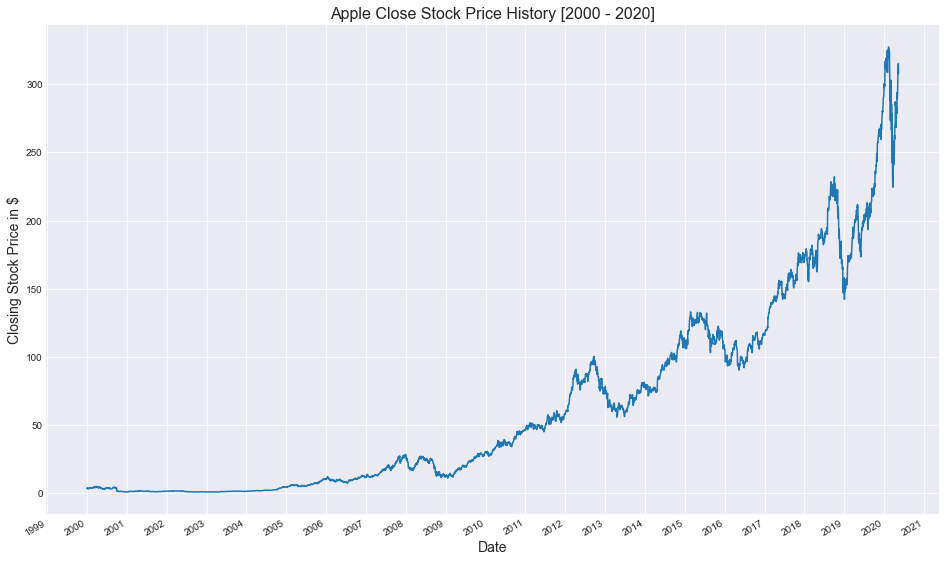

In [13]:
# Import matplotlib package for date plots
# months = mdates.MonthLocator() # Get every year
# dateFmt = mdates.DateFormatter('%Y-%m') # Set year format

years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(dateFmt)

# Set figure title
plt.title('Apple Close Stock Price History [2000 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

### Get stock of Apple, Google, Microsoft, Amazon, Facebook via Yahoo Finance

In [14]:
def get_close_stock_price(codes, start_date='2019-01-01', end_date='2020-04-30'):
    data = { code : yf.download(code, start_date, end_date) for code in codes }
    data = { key : pd.DataFrame(value, columns=['Close']).rename(columns={'Close': f'{key}'}) for key, value in data.items() }
    df = None
    for key, value in data.items():
        if df is None:
            df = value
        else:
            df = df.merge(value, left_index=True, right_index=True)
    return df

df = get_close_stock_price(['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB'], startday, today)
df.to_csv('data/close_price_big_5.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [15]:
df = pd.read_csv('data/close_price_big_5.csv', index_col=['Date'], infer_datetime_format=True, parse_dates=['Date'])
df.head()

,AAPL,GOOGL,MSFT,AMZN,FB
Date,,,,,
2012-05-18,75.768570,300.500488,29.270000,213.850006,38.230000
2012-05-21,80.182854,307.362366,29.750000,218.110001,34.029999
2012-05-22,79.567146,300.700714,29.760000,215.330002,31.000000
2012-05-23,81.508568,305.035034,29.110001,217.279999,32.000000
2012-05-24,80.760002,302.132141,29.070000,215.240005,33.029999


In [16]:
df.shape

(2009, 5)

In [17]:
df.index

DatetimeIndex(['2012-05-18', '2012-05-21', '2012-05-22', '2012-05-23',
               '2012-05-24', '2012-05-25', '2012-05-29', '2012-05-30',
               '2012-05-31', '2012-06-01',
               ...
               '2020-04-30', '2020-05-01', '2020-05-04', '2020-05-05',
               '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-11',
               '2020-05-12', '2020-05-13'],
              dtype='datetime64[ns]', name='Date', length=2009, freq=None)

In [18]:
df_plot = df.reset_index().melt('Date', var_name='cols',  value_name='vals')
df_plot.isna().values.any()

False

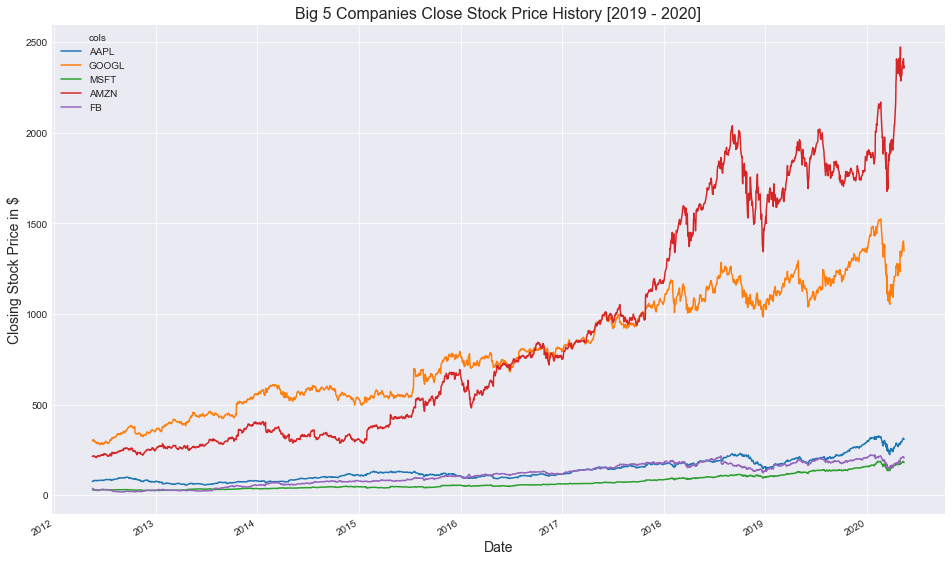

In [19]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Big 5 Companies Close Stock Price History [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

## Investigate correlation

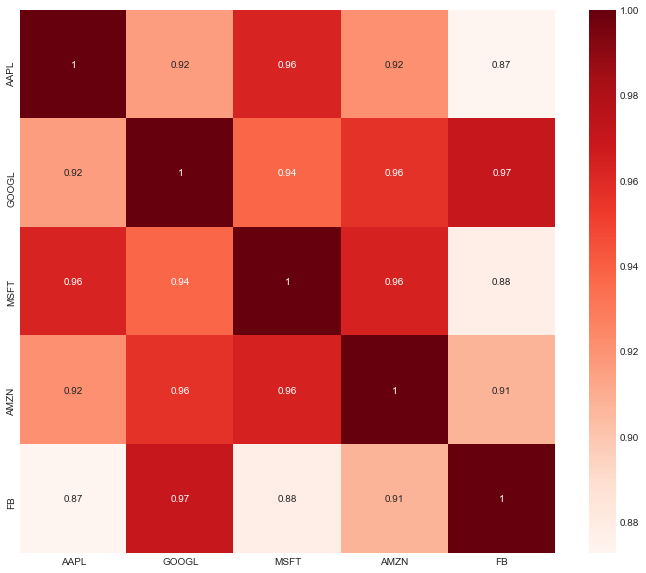

In [46]:
# pearson heat map
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

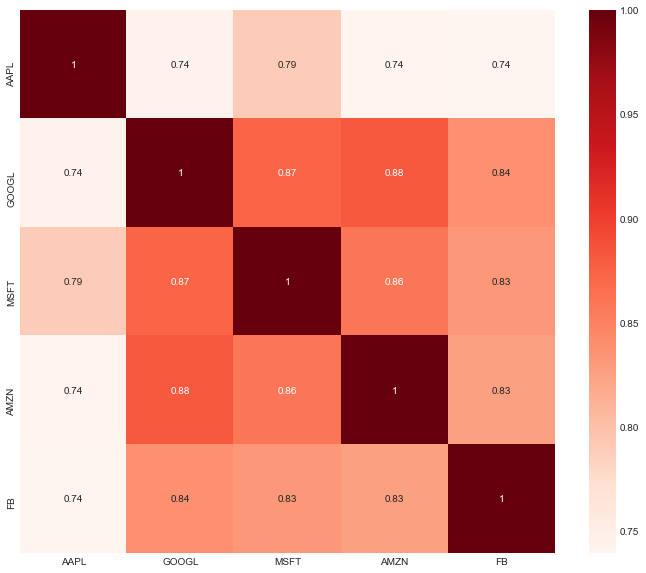

In [57]:
# kendall heat map
plt.figure(figsize=(12,10))
cor = df.corr(method='kendall')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

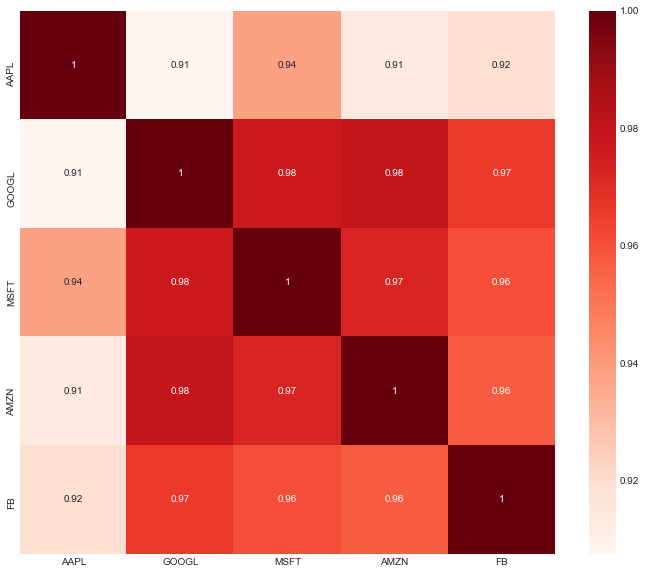

In [58]:
# spearman heat map
plt.figure(figsize=(12,10))
cor = df.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Comments
All correlation coefficients between each pair of stocks are high (all >= 0.74) $\to$ can use to predict each other future price

### Create X, y matrices for regression
Use history = number of days before prediction date

In [20]:
def create_Xy(df, history=1):
    '''df has index as date
    columns are stock price of the companies
    '''
    X, y, dates = [], [], []
    for row_idx in range(history, len(df)):
        y.append( df.iloc[row_idx,:].values.reshape(-1) )
        X.append( df.iloc[row_idx-history:row_idx,:].values.reshape(-1) )
        dates.append(df.index[row_idx])
    X, y = np.array(X), np.array(y)
    return X, y, dates

X,y,dates = create_Xy(df, history=5)
# use 7/10 of the dataset to train (use past price to predict future price)
n_train = len(y) * 7 // 10
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

### Create a Linear Regression Model to predict stock price

In [21]:
clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

In [22]:
clf.coef_.shape # nClasses x nFeatures

(5, 25)

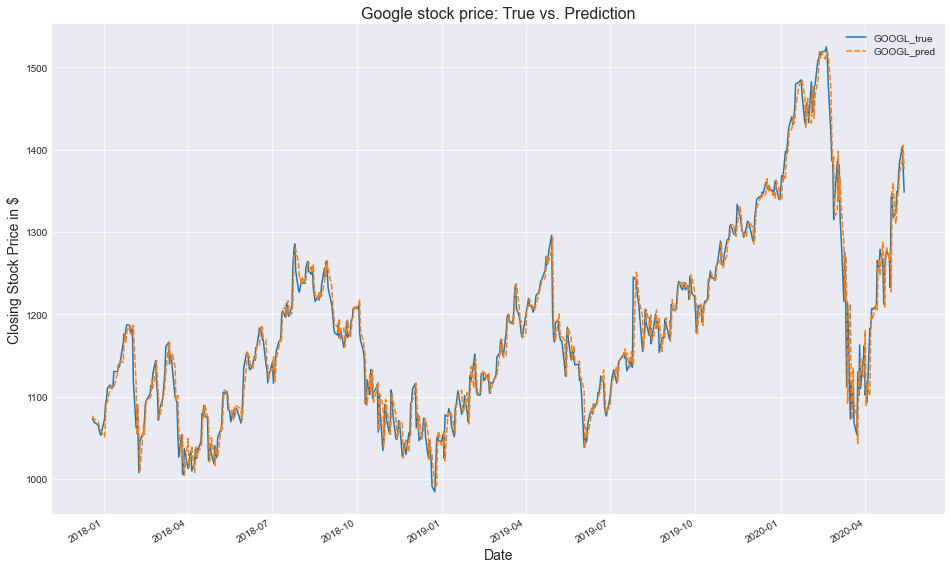

In [43]:
df_plot = pd.DataFrame({"GOOGL_true": y_test[:,1], 'GOOGL_pred': ypred[:,1]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Google stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

### Evaluate

In [60]:
def mean_relative_error(y_true, y_pred):
    return np.mean(np.abs(y_true-y_pred)/y_true)

In [67]:
print(f'Mean square error: {mean_squared_error(y_test, ypred):.4f}')
print(f'Mean absolute error: {mean_absolute_error(y_test, ypred):.4f}')
print(f'Mean square error: {mean_relative_error(y_test, ypred)*100:.4f}%')

Mean square error: 395.8610
Mean absolute error: 9.8943
Mean square error: 1.4615%
